# Determining Plot Kind

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Categorical Data

- Bar Charts

In [4]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [5]:
freq_table = tips.sex.value_counts()

<BarContainer object of 2 artists>

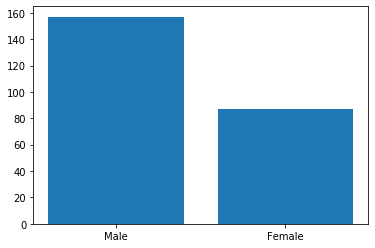

In [6]:
plt.bar(freq_table.index, freq_table)

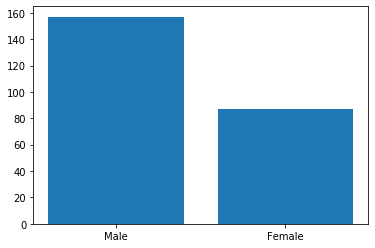

In [7]:
bars = plt.bar(freq_table.index, freq_table)

In [8]:
len(bars)

2

In [19]:
bars[0]

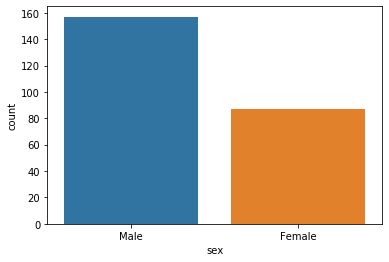

In [21]:
sns.countplot(tips.sex)

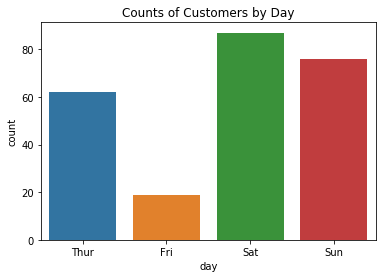

In [9]:
sns.countplot(tips.day)
plt.title('Counts of Customers by Day');

<BarContainer object of 4 artists>

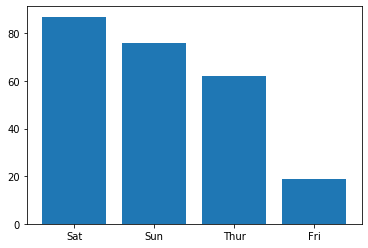

In [10]:
freq_table = tips.day.value_counts().sort_values(ascending = False)
plt.bar(freq_table.index, freq_table)

<BarContainer object of 4 artists>

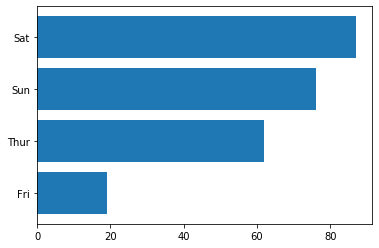

In [11]:
freq_table = tips.day.value_counts().sort_values()
plt.barh(freq_table.index, freq_table)

In [12]:
b2b_ex = tips.groupby(['day', 'sex']).mean().unstack()['total_bill']

In [13]:
b2b_ex.head()

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


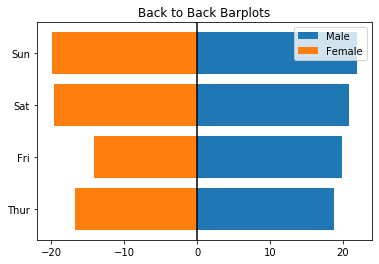

In [41]:
plt.barh(b2b_ex.index, b2b_ex['Male'], label = 'Male')
plt.barh(b2b_ex.index, -b2b_ex['Female'], label = 'Female')
plt.axvline(color = 'black')
plt.title('Back to Back Barplots')
plt.legend()

### Quantitative Data

- Histogram
 - shape
 - center
 - spread
 - outliers

In [14]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

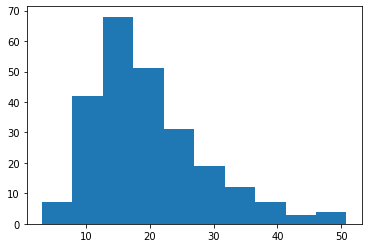

In [16]:
plt.hist(tips.total_bill);

In [17]:
median = tips.total_bill.median()

In [18]:
avg = tips.total_bill.mean()

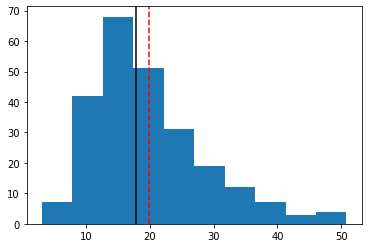

In [19]:
plt.hist(tips.total_bill)
plt.axvline(median, color = 'black')
plt.axvline(avg, linestyle = '--', color = 'red')

In [20]:
norm = np.random.normal(size = 500)

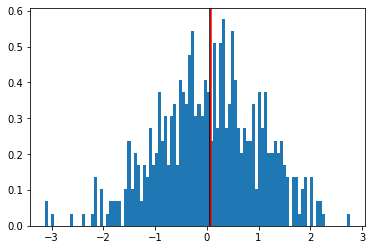

In [22]:
plt.hist(norm, density = True, bins = 100)
plt.axvline(norm.mean(), color = 'black')
plt.axvline(np.median(norm), color = 'red')

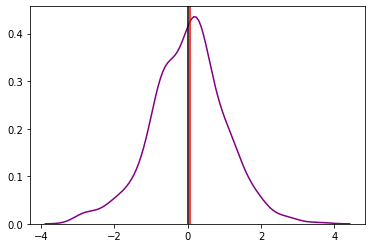

In [73]:
sns.distplot(norm, color = 'purple', hist = False)
plt.axvline(norm.mean(), color = 'black')
plt.axvline(np.median(norm), color = 'red')

##### Box Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x12641d510>,
 'caps': [<matplotlib.lines.Line2D at 0x12641dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1264148d0>],
 'medians': [<matplotlib.lines.Line2D at 0x126480a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x126480f50>],
 'means': []}

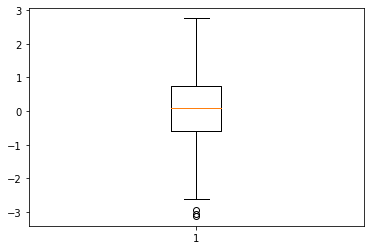

In [23]:
plt.boxplot(norm)

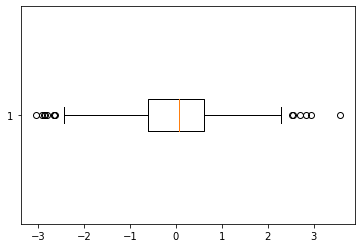

In [76]:
plt.boxplot(norm, vert = False);

In [80]:
pd.DataFrame(norm).describe().T

,count,mean,std,min,25%,50%,75%,max
0,500.0,0.009377,1.01238,-3.050672,-0.610988,0.066392,0.621167,3.579947


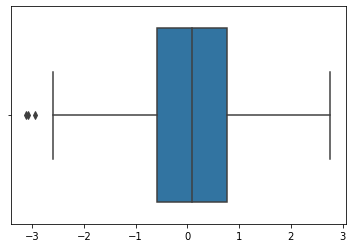

In [24]:
sns.boxplot(norm)

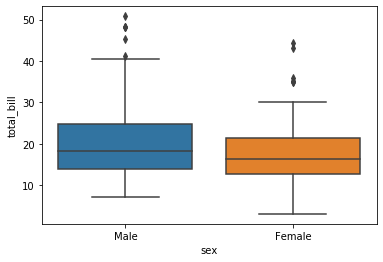

In [89]:
sns.boxplot(tips.sex, tips.total_bill)

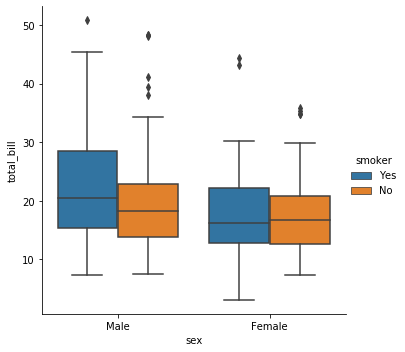

In [92]:
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips, kind = 'box')

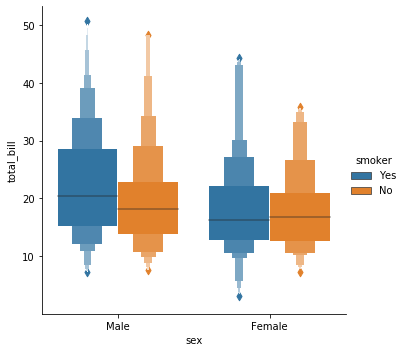

In [25]:
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips, kind = 'boxen')

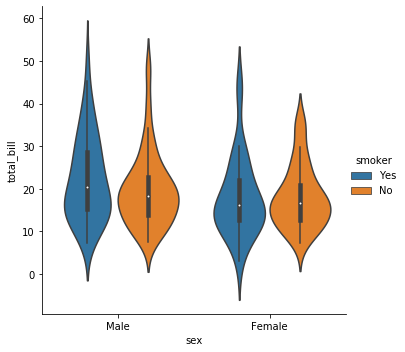

In [26]:
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips, kind = 'violin')

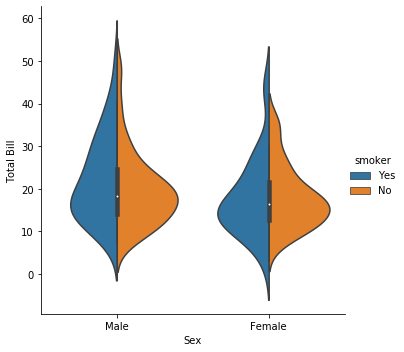

In [27]:
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', 
            data = tips, kind = 'violin',
           split = True)
plt.xlabel('Sex')
plt.ylabel('Total Bill');

##### PROBLEMS

1. Use the titanic data to construct a bar chart of categorical data.
2. Use the titanic data to construct a histogram of a quantitative feature.  Describe the shape, center, spread, and outliers of the data based on this plot.
3. Create a boxplot of the same data from 2.

**BONUS**

Create a 2 by 1 plot with boxplot on top and histogram on bottom where boxplot is half the height of the histogram.


In [42]:
titanic = sns.load_dataset('titanic')

In [43]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 'Counts of Life')

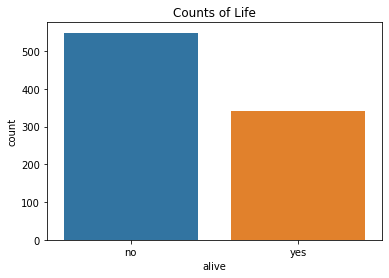

In [45]:
sns.countplot(titanic.alive)
plt.title('Counts of Life')

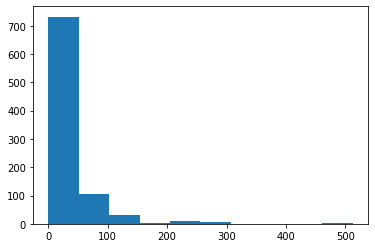

In [47]:
plt.hist(titanic.fare);

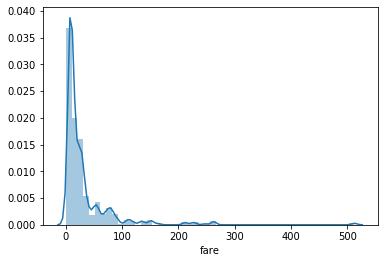

In [48]:
sns.distplot(titanic.fare)

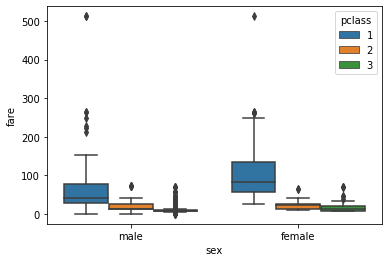

In [59]:
sns.boxplot(x = 'sex', y = 'fare', hue = 'pclass', data = titanic)

In [50]:
df = pd.read_csv('data/gapminder_all.csv')

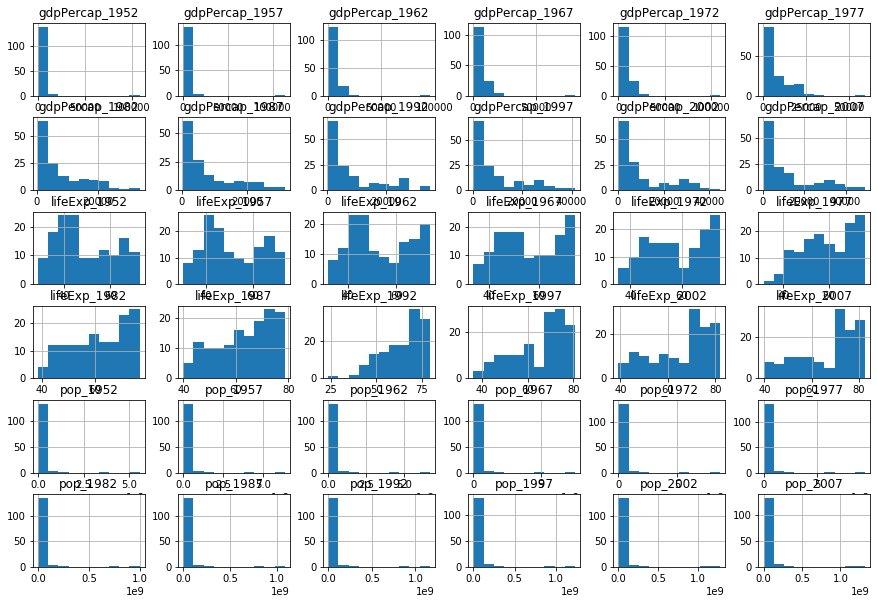

In [52]:
df.hist(figsize = (15, 10));

In [28]:
vmars = pd.read_html('https://en.wikipedia.org/wiki/List_of_Veronica_Mars_episodes')[1]

In [30]:
vmars['Original air date'] = pd.to_datetime(vmars['Original air date'])

### Multivariate Data

Categorical:

- side by side barchart
- stacked bar chart

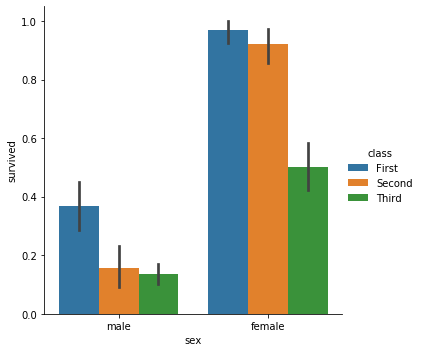

In [111]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', 
            kind = 'bar', data = titanic)

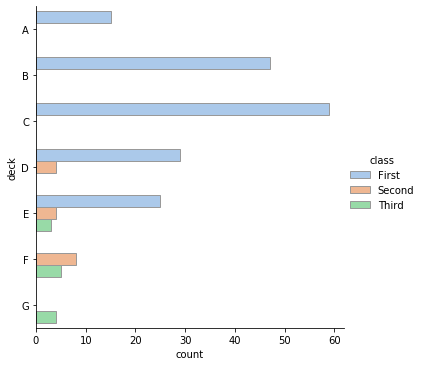

In [60]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

##### PROBLEM

What would another example of a multivariate categorical plot from the tips data be?  

##### Multivariate Quantitative

In [61]:
ads = pd.read_csv('data/ads.csv', index_col = 0)

In [62]:
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


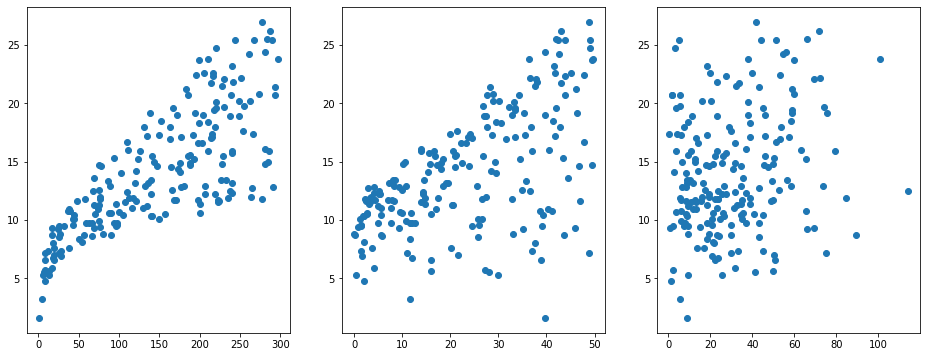

In [65]:
#create a 1 row by 3 column collection of scatterplots
#of advertising medium vs. sales
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
ax[0].scatter(ads.TV, ads.sales)
ax[1].scatter(ads.radio , ads.sales)
ax[2].scatter(ads.newspaper , ads.sales)

In [66]:
#correlation
ads.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


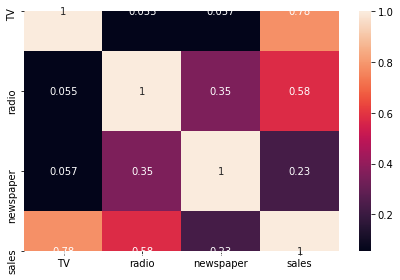

In [69]:
#heatmap
sns.heatmap(ads.corr(), annot = True)
plt.tight_layout()

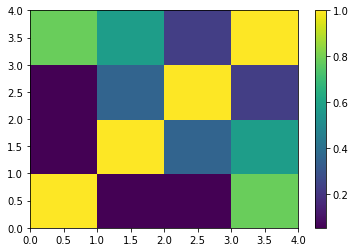

In [71]:
plt.pcolor(ads.corr())
plt.colorbar()

##### Problem

Use a heatmap to explore the data below.  What variable seems to be the highest correlation with Sales Price?

In [72]:
ames = pd.read_csv('data/ames_housing.csv')

In [73]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


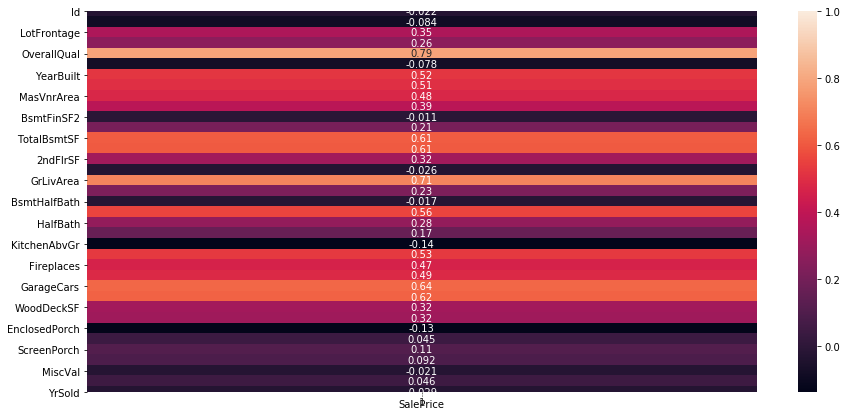

In [80]:
plt.figure(figsize = (15, 7))
sns.heatmap(ames.corr()[['SalePrice']], annot = True)